In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.svm import SVC
import warnings
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [3]:
datos = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Datos.xlsx', sheet_name = "Hoja1")
datos = pd.DataFrame(datos)
datos = datos.dropna(axis = 0, how ="any")
datos.head(10)

,Evento,A1,D1,AI1,MI1,CI1,A2,D2,AI2,MI2,...,SM40,SM60,SM80,SM100,24PA1,24PA2,48PA1,48PA2,MAXD,INITIALQ
0,Evento 1,16.382445,55,17.871758,399.148547,27.132184,12.66,55,13.810909,93.850000,...,0.490273,0.519179,0.535343,0.503777,16.382445,13.0,19.460113,13.4,17.246332,6.854821
1,Evento 2,15.827108,35,27.132184,312.330000,27.132184,14.80,40,22.200000,84.375000,...,0.495030,0.524897,0.540182,0.506062,56.089048,50.2,56.089048,50.2,20.280403,7.080917
2,Evento 3,54.700705,1125,2.917371,138.830000,11.285883,47.00,1125,2.506667,109.375000,...,0.505497,0.537286,0.552282,0.514057,56.089048,50.2,56.089048,50.2,30.667560,7.092906
3,Evento 4,13.883428,105,7.933387,86.771423,7.933387,12.40,95,7.831579,28.125000,...,0.515011,0.553487,0.572852,0.534618,1.000000,1.0,1.000000,1.0,15.663358,9.328517
4,Evento 5,5.553371,60,5.553371,104.125708,8.554286,5.00,50,6.000000,21.875000,...,0.545459,0.576360,0.598261,0.557462,23.324159,18.2,60.809413,50.8,16.910000,13.085455
5,Evento 6,24.434833,340,4.312029,173.542846,15.202500,23.40,400,3.510000,44.791667,...,0.520720,0.559205,0.581322,0.542613,3.332023,2.8,3.332023,2.8,23.893522,11.809956
6,Evento 7,3.054354,55,3.332023,69.417139,6.000000,2.80,65,2.584615,11.458333,...,0.535944,0.576360,0.598261,0.550609,26.656181,24.2,29.988204,27.0,14.280000,12.886883
7,Evento 8,19.436799,85,13.720093,312.370000,27.600000,15.40,45,20.533333,66.666650,...,0.528332,0.568736,0.594631,0.551751,20.269804,19.2,46.925986,43.4,36.390000,13.014717
8,Evento 9,5.275703,25,12.661686,69.417139,12.661686,5.00,35,8.571429,25.000000,...,0.537847,0.578266,0.600681,0.560889,9.718399,9.0,29.988204,28.2,16.530000,13.709470
9,Evento 10,3.609691,50,4.331629,34.708569,4.980000,3.40,65,3.138462,8.333333,...,0.541653,0.579219,0.601891,0.560889,9.718399,9.0,29.988204,28.2,17.006422,14.355421


In [4]:
MAXD = datos[['MAXD']]
Expl= pd.DataFrame(datos[['A2', '48PA2']])

In [5]:
train_sizes = [10, 50, 70, 90, 100,125,150,170,190,200]

In [6]:
features = ['A2', '48PA2']
target = 'MAXD'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestRegressor(bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split = 5, n_estimators=2000),
X = datos[features],
y = datos[target], train_sizes = train_sizes, cv = 15,
scoring = 'neg_mean_squared_error')

In [7]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-290.28509596  -17.56826503  -17.12570364  -17.13712086  -16.84140357
   -16.8348488   -17.46397184  -17.17840563  -17.59125617  -17.44346445
   -17.08249768  -17.38463951  -16.93982385  -17.08170862  -16.98679913]
 [ -59.20109743  -54.64983403  -63.41881315  -75.48966388  -76.42420372
   -75.67033485  -76.71619184  -76.90743269  -76.33720384  -76.28217221
   -76.10601817  -76.3155012   -75.80266632  -76.08306132  -76.02413059]
 [ -35.02525864  -38.76780471  -47.26619623  -55.89640732  -54.1368078
   -55.5952109   -55.41462266  -55.6535894   -55.23335751  -55.10124713
   -55.40711853  -55.17868365  -55.39091101  -54.93703196  -55.21840666]
 [ -44.33825658  -43.00771558  -52.47204809  -61.29275009  -60.13616497
   -61.03789191  -43.44280845  -43.60089704  -43.71859072  -43.86081189
   -43.55969354  -43.65403978  -43.68340855  -43.96409416  -43.70548128]
 [ -44.99407746  -44.84075175  -48.19844311  -58.33533861  -56.98703879
   -57.13061017  -45.0785857   -38.4935722

In [8]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 10      35.396334
50      72.761888
70      52.281510
90      47.698310
100     44.230310
125    197.608205
150    263.237668
170    237.983957
190    224.503602
200    222.761171
dtype: float64

 --------------------

Mean validation scores

 10     858.301688
50     512.144113
70     505.752416
90     501.922248
100    487.371167
125    479.509653
150    479.746216
170    476.840232
190    480.644757
200    455.669885
dtype: float64


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


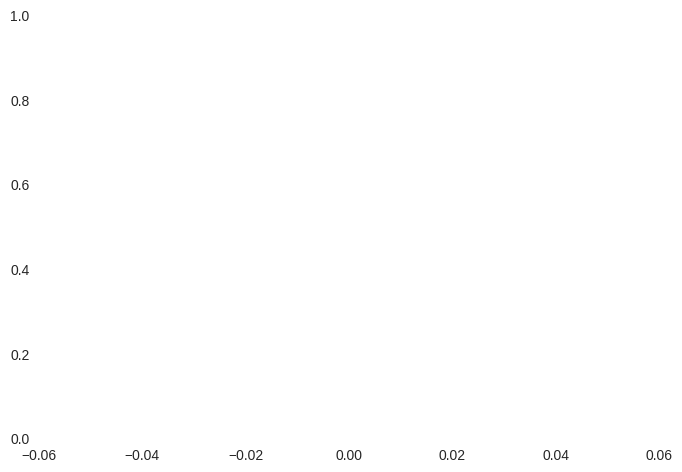

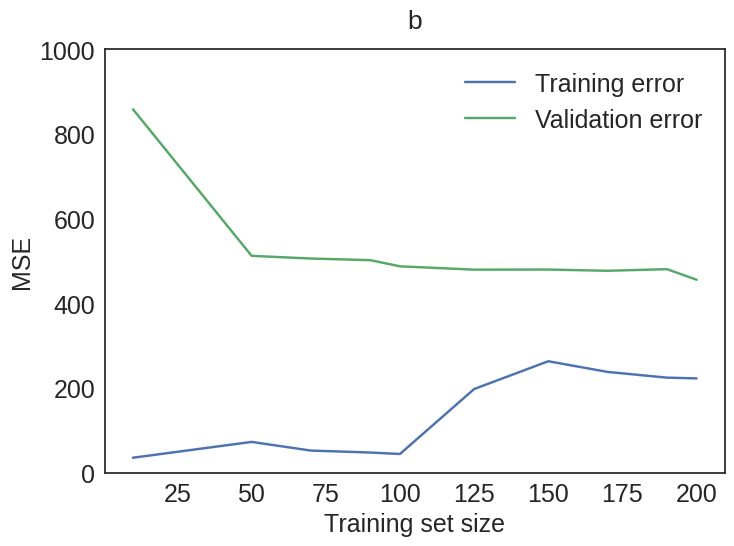

In [9]:
plt.style.use('seaborn')
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 18)
plt.xlabel('Training set size', fontsize = 18)
plt.title('b', fontsize = 19, y = 1.03)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.ylim(0,1000)
plt.savefig("Learning_curve_Random_normald_.jpg", dpi = 500)

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/en

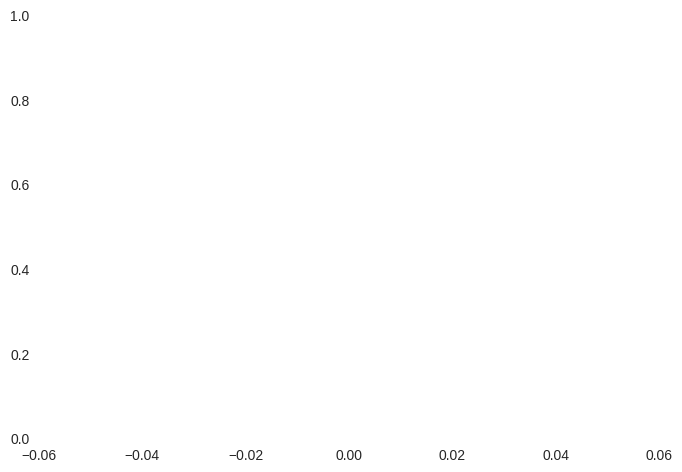

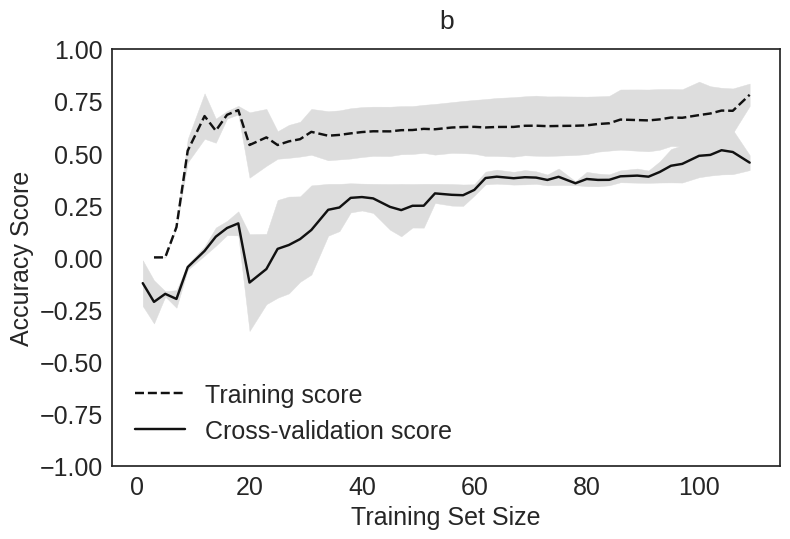

In [11]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split = 5, n_estimators=2000), Expl, MAXD,cv=2, scoring='r2', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("b", fontsize = 19, y = 1.03)
plt.xlabel("Training Set Size", fontsize =18), plt.ylabel("Accuracy Score", fontsize=18), plt.legend(loc="best", fontsize =18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.ylim(-1, 1)
plt.tight_layout()
plt.savefig("bias_variance_Random_normal_.jpg", dpi = 500)

In [13]:
kfold = ShuffleSplit(n_splits=30, test_size=0.3, random_state=1)
model = RandomForestRegressor(bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split = 5, n_estimators=2000)
results = cross_val_score(model, Expl ,MAXD, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

[0.65020119 0.55670241 0.70280961 0.70649143 0.51484796 0.44377063
 0.66309791 0.53199673 0.73295508 0.57453148 0.51854316 0.56499734
 0.49630099 0.21648538 0.39510007 0.32393968 0.39959926 0.59952588
 0.67860951 0.40422502 0.52372853 0.49829021 0.42578447 0.40018266
 0.52932348 0.57962249 0.67105887 0.72420083 0.5372474  0.72825843]
0.5430809367788836
0.12766809209728078


In [14]:
X_train,X_test, y_train,y_test = train_test_split(Expl,MAXD, random_state=1)
lr=RandomForestRegressor(bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split = 5, n_estimators=2000)
lr.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=2000)

In [15]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.6844259198202431
Test score: 0.6402326149886454
